%matplotlib inline


# Vis Autoselect

In this Demo we will autoselect visualisation depending of the input arrays from ML experiments.

Load Data and train model
-------------------------

We will set the sample inputs here 

In [ ]:
# Sample Model 

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = fetch_openml(data_id=1464, return_X_y=True)

# y_test right labeled data 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf.fit(X_train, y_train)

# y_pred: prediciton for data labeled
y_pred = clf.predict(X_test)

# y_score: confidence scores
y_score = clf.decision_function(X_test)

Accuracy: 
0.7754010695187166
Hamming Loss:
0.22459893048128343


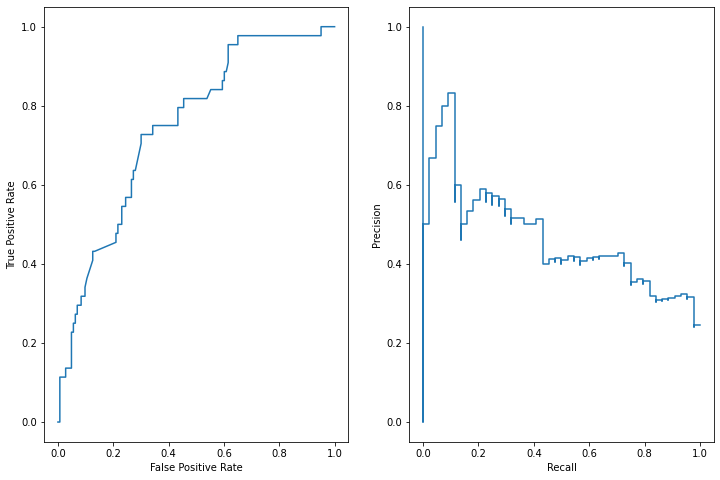

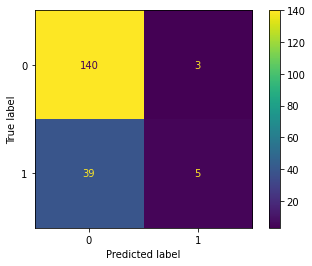

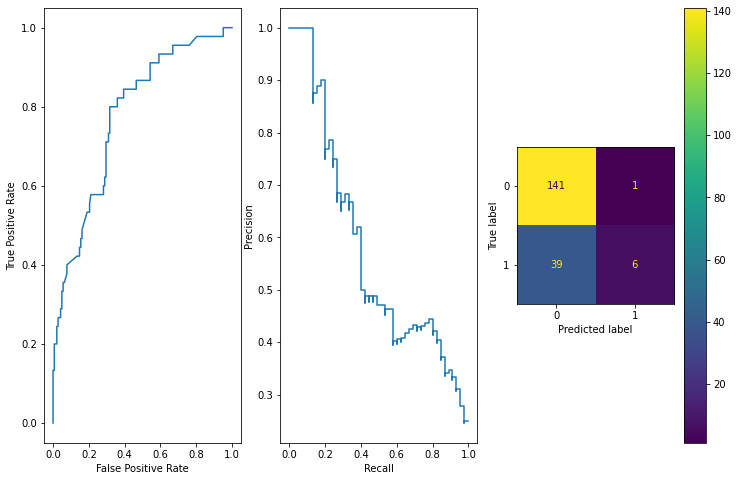

In [8]:
# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

#cm_display = ConfusionMatrixDisplay(cm).plot()


# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
y_score = clf.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, '2')

roc = np.array([fpr, tpr])

#roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


# precision recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay


prec, recall, _ = precision_recall_curve(y_test, y_score, '2')
#pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

In [127]:
roc

array([[0.        , 0.        , 0.        , 0.02097902, 0.02097902,
        0.02797203, 0.02797203, 0.03496503, 0.03496503, 0.04195804,
        0.04895105, 0.06293706, 0.06293706, 0.06993007, 0.06993007,
        0.08391608, 0.09090909, 0.09090909, 0.1048951 , 0.14685315,
        0.14685315, 0.15384615, 0.17482517, 0.17482517, 0.18881119,
        0.18881119, 0.1958042 , 0.1958042 , 0.2027972 , 0.2027972 ,
        0.24475524, 0.25874126, 0.25874126, 0.3006993 , 0.30769231,
        0.33566434, 0.33566434, 0.34265734, 0.34265734, 0.45454545,
        0.45454545, 0.48951049, 0.51748252, 0.55244755, 0.55244755,
        0.57342657, 0.58041958, 0.6013986 , 0.6013986 , 0.62937063,
        0.65734266, 0.67132867, 0.68531469, 0.68531469, 0.72027972,
        0.76923077, 0.78321678, 0.78321678, 0.7972028 , 0.7972028 ,
        0.8041958 , 0.8041958 , 0.82517483, 0.86013986, 0.87412587,
        0.88111888, 0.8951049 , 0.91608392, 0.94405594, 1.        ],
       [0.        , 0.02272727, 0.06818182, 0.0

In [7]:
import os
import vis_autselect.visualize as visualize
import importlib

# set import path
project_dir = os.path.abspath("..")

# reload package - development
importlib.reload(visualize)


#help(visualize)

# Example Classifier
vis = visualize.Visualizer()
vis.select(y_test)
vis.select(y_pred)
vis.select(y_score)
vis.select(cm)
vis.select(roc)

vis.info()


# Example annotated


vis.delete_data()

annotaded_data = {
    'Confidence Scores': y_score, 
    'Confusion Matrix' : cm,
    'ROC' : roc,
    'Ground Truth Values' : y_test, 
    'Predictions' : y_pred
}

only_cm = {
    'Ground Truth Values' : y_test, 
    'Predictions' : y_pred
}

vis.input_dict(only_cm)
vis.info()
visses = vis.visualize()


vis.delete_data()




# todo match for visualizations!  then actual visualizations

The following arrays have beem classified:  ['Confidence Scores', 'Confusion Matrix', 'ROC'] 

For the given array a decision between the types:  ['Ground Truth Values', 'Predictions']  could have not been made.
Input Data:  ['1', '1', '1', '1', '1', '2', '1', '2', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '1', '2', '1', '1', '1', '1', '1', '2', '1', '2', '1', '2', '1', '2', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '2', '1', '1', '1', '2', '2', '1', '2', '1', '1', '2', '1', '2', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '2', '1', '2', '1', '1', '1', '1', '1', '1', '2', '1', '2', '1', '2', '2', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '2', '1', '2', '1', '1', '2', '1', '1', '1', '1', '1', '1', '2', '2', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1',

In [6]:
# Example Classifier
vis = visualize.Visualizer()
vis.select(y_test)
vis.select(y_pred)
vis.select(y_score)
vis.select(cm)
vis.select(roc)

vis.info()

The following arrays have beem classified:  ['Confidence Scores', 'Confusion Matrix', 'ROC'] 

For the given array a decision between the types:  ['Ground Truth Values', 'Predictions']  could have not been made.
Input Data:  ['2', '1', '1', '1', '1', '2', '2', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '1', '1', '1', '2', '2', '1', '1', '1', '2', '2', '1', '1', '2', '1', '1', '1', '2', '2', '1', '1', '1', '1', '1', '2', '2', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '2', '2', '1', '2', '2', '2', '1', '2', '1', '1', '1', '1', '2', '1', '1', '1', '2', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '2', '1', '2', '1', '1', '2', '1', '1', '1', '1', '2', '1', '2', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '2', '2', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '2', '1', '2', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1',

In [9]:
annotaded_data = {
    'Confidence Scores': y_score, 
    'Confusion Matrix' : cm,
    'ROC' : roc,
    'Ground Truth Values' : y_test, 
    'Predictions' : y_pred
}

vis.input_dict(annotaded_data)
vis.info()

The following arrays have beem classified:  ['Confidence Scores', 'Confusion Matrix', 'ROC', 'Ground Truth Values', 'Predictions'] 



In [115]:
roc = None

# write about true classes 


test = [[2, 3, 3], [2]]

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss
import numpy as np

def visualize(y_test, y_pred, y_score):
    
    #print(y_test)
    #print(y_pred)
    #print(y_score)
    
    #Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(cm)
    
    # Roc Curve
    fpr, tpr, _ = roc_curve(y_test, y_score, '2')
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
    
    # Precision Recall Curve
    prec, recall, _ = precision_recall_curve(y_test, y_score, '2')
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)
    
    #End Vis
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
    
    print("Accuracy: ")
    print(accuracy_score(y_test, y_pred))
    
    print("Hamming Loss:")
    print(hamming_loss(y_test, y_pred))

    roc_display.plot(ax=ax1)
    pr_display.plot(ax=ax2)
    # cm_display.plot(ax=ax3)
    plt.show()
    cm_display = ConfusionMatrixDisplay(cm).plot()

visualize(y_test, y_pred, y_score)


# vis in one line 
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
cm_display.plot(ax=ax3)
plt.show()